In [93]:
import gdown
import zipfile

In [94]:
url = "https://drive.google.com/file/d/1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE/view?usp=sharing"

file_id = url.split("/")[-2]
file_id

'1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE'

In [95]:
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix + file_id, 'garbage.zip')

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE&confirm=t&uuid=b49e50ef-ca81-44d4-826e-abe222e00fbd
To: /kaggle/working/garbage.zip
100%|██████████| 133M/133M [00:00<00:00, 154MB/s]  


'garbage.zip'

In [96]:
zip_path = "/kaggle/working/garbage.zip"
extract_path = ""

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete!")

Extraction complete!


In [97]:
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [89]:
# gas_ranges = {
#     "battery" : {"CH4" : (1,3), "CO2": (550, 650), "CO": (1, 3) , "H2S":(0.02,0.05), "VOCs":(2, 6), "NH3":(0.001, 0.003), "Odor Intensity":(3,5)},
#     "biological" : {"CH4" : (200,350), "CO2": (1200, 1600), "CO": (15, 30) , "H2S":(0.4,0.7), "VOCs":(12, 20), "NH3":(0.2, 0.35), "Odor Intensity":(8,9)},
#     "brown-glass" : {"CH4" : 0, "CO2": (450, 550), "CO": 0 , "H2S": 0, "VOCs":0, "NH3":0, "Odor Intensity":0},
#     "cardboard" : {"CH4" : (2,4), "CO2": (500, 600), "CO": (2, 4) , "H2S":(0.002, 0.006), "VOCs":(0.5, 1), "NH3":(0.001, 0.003), "Odor Intensity":(2,3)},
#     "clothes" : {"CH4" : (5,8), "CO2": (600, 750), "CO": (5, 8) , "H2S":(0.01, 0.03), "VOCs":(3,7), "NH3":(0.005, 0.01), "Odor Intensity":(4,5)},
#     "green-glass" : {"CH4" : 0, "CO2": (450, 550), "CO": 0 , "H2S": 0, "VOCs":0, "NH3":0, "Odor Intensity":0},
#     "metal" : {"CH4" : 0, "CO2": (450, 550), "CO": 0 , "H2S": 0, "VOCs":0, "NH3":0, "Odor Intensity":0},
#     "paper" : {"CH4" : (1,3), "CO2": (500, 600), "CO": (1, 3) , "H2S":(0.001, 0.004), "VOCs":(0.3,0.7), "NH3":(0, 0.002), "Odor Intensity":(1,2)},
#     "plastic" : {"CH4" : (3,6), "CO2": (600, 800), "CO": (4, 7) , "H2S":(0.002, 0.006), "VOCs":(6,12), "NH3":(0.001, 0.003), "Odor Intensity":(3,4)},
#     "shoes" : {"CH4" : (5,8), "CO2": (600, 750), "CO": (5, 8) , "H2S":(0.01, 0.03), "VOCs":(3,7), "NH3":(0.005, 0.01), "Odor Intensity":(4,5)},
#     "trash" : {"CH4" : (10,20), "CO2": (700, 900), "CO": (8, 12) , "H2S":(0.05, 0.1), "VOCs":(4,8), "NH3":(0.01, 0.02), "Odor Intensity":(5,6)},
#     "white-glass" : {"CH4" : 0, "CO2": (450, 550), "CO": 0 , "H2S": 0, "VOCs":0, "NH3":0, "Odor Intensity":0}
    
# }

In [98]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

base_dir = "/kaggle/working/garbage"

def check_image_formats(base_dir, valid_exts):
    all_images_valid = True
    invalid_images = []

    for sub_dir in os.listdir(base_dir):
        sub_dir_path = os.path.join(base_dir, sub_dir)
        if not os.path.isdir(sub_dir_path):
            continue

        for file_name in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path, file_name)

            if os.path.isdir(file_path):
                continue

            file_ext = file_name.split('.')[-1].lower()
            if file_ext not in valid_exts:
                all_images_valid = False
                invalid_images.append(file_path)

    if all_images_valid:
        print("All images are in the specified formats.")
    else:
        print("The following images are not in the specified formats:")
        for img in invalid_images:
            print(img)

check_image_formats(base_dir, image_exts)


All images are in the specified formats.


In [99]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))

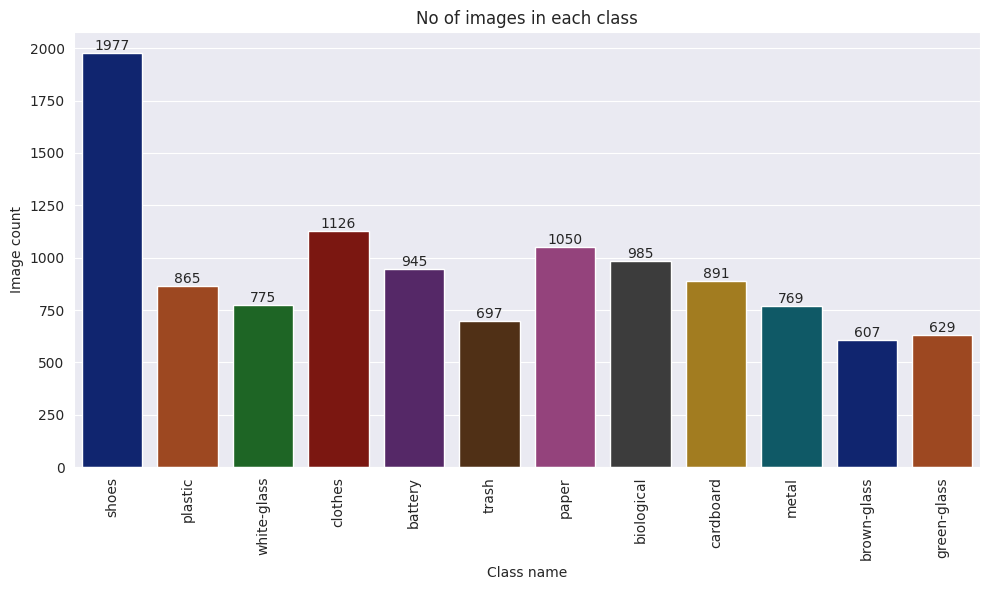

In [100]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## In above barplot we can clearly see data is imblanced

In [101]:
import os
import random

base_path = "/kaggle/working/garbage"

for sub_dir in os.listdir(base_path):
    sub_dir_path = os.path.join(base_path, sub_dir)
    images = os.listdir(sub_dir_path)
    total_images = len(images)

    if total_images > 700:
        images_to_delete = total_images - 700  

        for _ in range(images_to_delete):
            random_img = random.choice(images)
            delete_img = os.path.join(sub_dir_path, random_img)

            os.remove(delete_img)
            images.remove(random_img)  

        print(f"Deleted {images_to_delete} images in {sub_dir}")
    else:
        print(f"No deletion needed in {sub_dir}")


Deleted 1277 images in shoes
Deleted 165 images in plastic
Deleted 75 images in white-glass
Deleted 426 images in clothes
Deleted 245 images in battery
No deletion needed in trash
Deleted 350 images in paper
Deleted 285 images in biological
Deleted 191 images in cardboard
Deleted 69 images in metal
No deletion needed in brown-glass
No deletion needed in green-glass


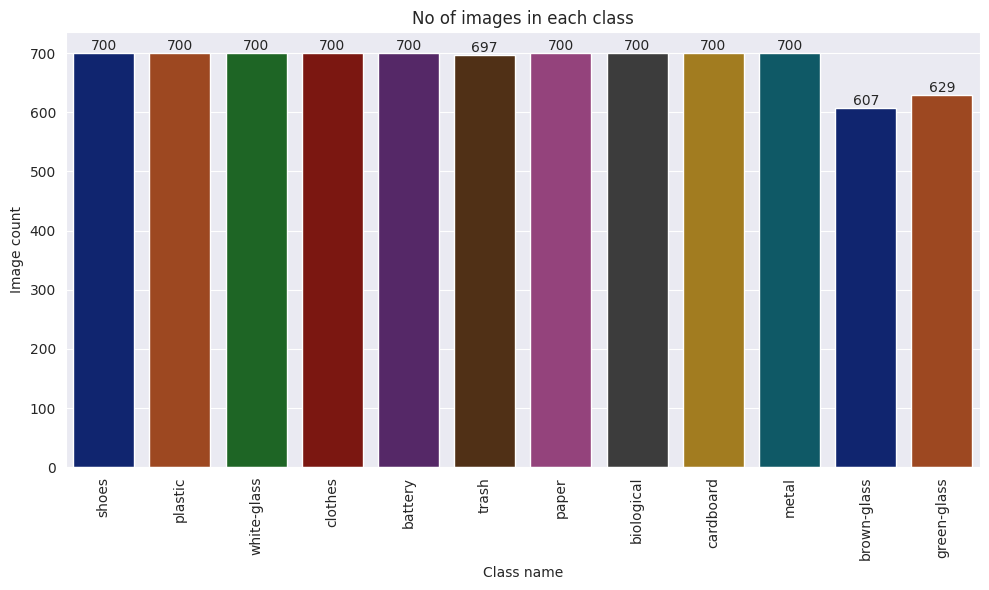

In [102]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))



plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [103]:
import random

garbage_classes = {
    "battery":       {"CH4": (1, 3), "CO2": (550, 650), "CO": (1, 3), "H2S": (0.02, 0.05), "VOCs": (2, 6), "NH3": (0.001, 0.003), "Odor": (3, 5)},
    "biological":    {"CH4": (200, 350), "CO2": (1200, 1600), "CO": (15, 30), "H2S": (0.4, 0.7), "VOCs": (12, 20), "NH3": (0.2, 0.35), "Odor": (8, 9)},
    "brown-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "cardboard":     {"CH4": (2, 4), "CO2": (500, 600), "CO": (2, 4), "H2S": (0.002, 0.006), "VOCs": (0.5, 1), "NH3": (0.001, 0.003), "Odor": (2, 3)},
    "clothes":       {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "green-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "metal":         {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "paper":         {"CH4": (1, 3), "CO2": (500, 600), "CO": (1, 3), "H2S": (0.001, 0.004), "VOCs": (0.3, 0.7), "NH3": (0, 0.002), "Odor": (1, 2)},
    "plastic":       {"CH4": (3, 6), "CO2": (600, 800), "CO": (4, 7), "H2S": (0.002, 0.006), "VOCs": (6, 12), "NH3": (0.001, 0.003), "Odor": (3, 4)},
    "shoes":         {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "trash":         {"CH4": (10, 20), "CO2": (700, 900), "CO": (8, 12), "H2S": (0.05, 0.1), "VOCs": (4, 8), "NH3": (0.01, 0.02), "Odor": (5, 6)},
    "white-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
}

dataset_path = "/kaggle/working/garbage"

data = []

for category, ranges in garbage_classes.items():
    category_path = os.path.join(dataset_path, category)
    
    if os.path.exists(category_path):
        for img_file in os.listdir(category_path):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):  
                img_path = os.path.join(category_path, img_file)
                
                sensor_values = {gas: round(random.uniform(*range_val), 3) for gas, range_val in ranges.items()}
                
                data.append({"image_path": img_path, "label": category, **sensor_values})

df = pd.DataFrame(data)

df.to_csv("garbage_sensor_data.csv", index=False)


In [104]:
path = "/kaggle/working/garbage_sensor_data.csv"
data = pd.read_csv(path)

data = pd.DataFrame(data)

In [105]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(data,test_size=0.2,random_state=42,stratify=data['label'])


print(f"Number of images in the training set: {len(train_df)}")
print(f"Number of images in the validation set: {len(val_df)}")

Number of images in the training set: 6586
Number of images in the validation set: 1647


In [108]:
overall_distribution = data['label'].value_counts(normalize=True) * 100

train_distribution = train_df['label'].value_counts(normalize=True) * 100

val_distribution = val_df['label'].value_counts(normalize=True) * 100


print("Class distribution in the entire dataset:\n")
print(overall_distribution.round(2))
print('-'*40)

print("\nClass distribution in the training set:\n")
print(train_distribution.round(2))
print('-'*40)

print("\nClass distribution in the validation set:\n")
print(val_distribution.round(2))

Class distribution in the entire dataset:

label
battery        8.50
biological     8.50
cardboard      8.50
clothes        8.50
white-glass    8.50
metal          8.50
paper          8.50
plastic        8.50
shoes          8.50
trash          8.47
green-glass    7.64
brown-glass    7.37
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the training set:

label
metal          8.50
white-glass    8.50
cardboard      8.50
clothes        8.50
shoes          8.50
biological     8.50
plastic        8.50
paper          8.50
battery        8.50
trash          8.46
green-glass    7.64
brown-glass    7.38
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the validation set:

label
battery        8.50
white-glass    8.50
plastic        8.50
paper          8.50
clothes        8.50
metal          8.50
cardboard      8.50
shoes          8.50
trash          8.50
biological     8.50
green-glass    7.65
brown